In [ ]:
!pip install -U transformers
!pip install -U accelerate
!pip install -U datasets
!pip install -U bertviz
!pip install -U umap-learn
!pip install seaborn --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 44.4 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.47.1
    Uninstalling transformers-4.47.1:
      Successfully uninstalled transformers-4.47.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.6/336.6 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: accelerate
    Found existing installation: accelerate 1.2.1
    Uninstalling accelerate-1.2.1:
      Successfully uninstalled accelerate-1.2.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 6.6 MB/s eta 0:00:00
  Attempting uni

In [ ]:
import numpy as np

In [ ]:
import pandas as pd
data = pd.read_csv("https://drive.google.com/uc?id=1Xm3HWAnrHjLmvPTMVIMW4q624SBr_SCH")

In [ ]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


,0
review,0
sentiment,0


In [ ]:
data['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


::# Dataset Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

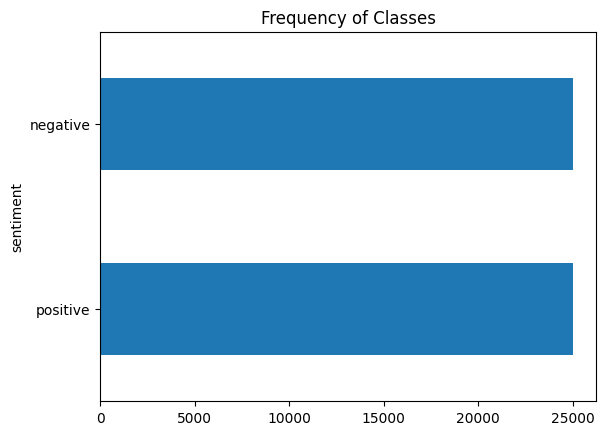

In [ ]:
label_counts = data['sentiment'].value_counts(ascending=True)
label_counts.plot.barh()
plt.title("Frequency of Classes")
plt.show()

<Axes: title={'center': 'Words per Tweet'}, xlabel='sentiment'>

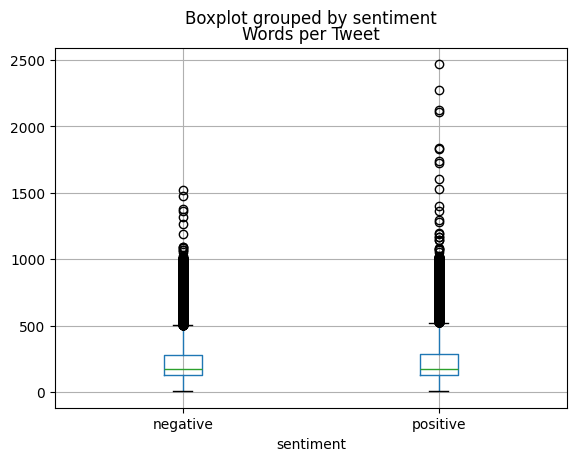

In [ ]:
data['Words per Tweet'] = data['review'].str.split().apply(len)
data.boxplot("Words per Tweet", by="sentiment")

In [ ]:
data['label'] = data['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

#Text Preprocessing

In [ ]:
import re

def clean_text(sentence):
    sentence = re.sub(r'http[s]?://\S+', '', sentence).strip()
    sentence = re.sub(r'<br />', '', sentence)
    sentence = re.sub(r'@\w+', '', sentence).strip()
    sentence = re.sub(r'&amp;', '', sentence)
    sentence = re.sub(r'[^a-zA-Z\s]+', '', sentence).strip()
    sentence = sentence.lower()
    sentence = re.sub(r'\s+', ' ', sentence)
    return sentence

In [ ]:
df = data.copy()

In [ ]:
df['review'] = df['review'].apply(lambda text: clean_text(text))

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words = {re.sub(r"'", '', stop_word) for stop_word in stop_words}
stop_words.add('u')
stop_words.add('im')
stop_words.add('us')
stop_words.add('new')

In [ ]:
def remove_stopwords(text):
    words = re.findall(r'\b\w+\b',text)
    clean_words = [word for word in words if word not in stop_words]
    clean_text = " ".join(clean_words)
    return clean_text

In [ ]:
df['review'] = df['review'].apply(lambda text: remove_stopwords(text))

#Text to Token Conversion

In [ ]:
from transformers import AutoTokenizer

In [ ]:
model_ckpt = "distilbert-base-uncased"  #ENGLISH english
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

text = "We love to sleep! Winters are awesome!"
encoded_text = tokenizer(text)
print(encoded_text)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

{'input_ids': [101, 2057, 2293, 2000, 3637, 999, 12214, 2024, 12476, 999, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [ ]:
len(tokenizer.vocab),tokenizer.vocab_size, tokenizer.model_max_length

(30522, 30522, 512)

# Data Loader and Train Test Split

In [ ]:

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3, stratify=df['sentiment'])
test, validation = train_test_split(test, test_size=1/3, stratify=test['sentiment'])
train.shape, test.shape, validation.shape

((35000, 4), (10000, 4), (5000, 4))

In [ ]:
from datasets import Dataset, DatasetDict

dataset = DatasetDict({
    "train": Dataset.from_pandas(train, preserve_index=False),
    "test": Dataset.from_pandas(test, preserve_index=False),
    "validation": Dataset.from_pandas(validation, preserve_index=False)
})

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['review', 'sentiment', 'Words per Tweet', 'label'],
        num_rows: 35000
    })
    test: Dataset({
        features: ['review', 'sentiment', 'Words per Tweet', 'label'],
        num_rows: 10000
    })
    validation: Dataset({
        features: ['review', 'sentiment', 'Words per Tweet', 'label'],
        num_rows: 5000
    })
})

#Tokenization of emotion/sentiment data

In [ ]:
dataset['train'][:2]

{'review': ['otherwise excellent book lincoln american memory historian merrill peterson calls young mrlincoln boring dreadful film amazingly wrongheaded analysis simply proves great historians rarely fine film critics working doctoral dissertation abraham lincoln frederick douglass part preparation writing dissertation made careful analysis film tag gallaghers brilliant interpretation seminal book ford young mr lincoln comes culminating year first phase fords cinematic authorship greatest hollywood years ford directed three superb still fully appreciated films drums along mohawk stagecoachand young mrlincoln might seem odd say stagecoach fully appreciated purblind critics must perceive one greatest westerns perhaps even one hundred greatest films time however fully appreciated three films work together kind trilogya triptych fact ford creating sort mythic history america screen drums along mohawk revolutionary war young mrlincoln precivil war americafinally stagecoach post civil war a

In [ ]:
def tokenize(batch):
    temp= tokenizer(batch['review'], padding=True, truncation=True, max_length = 512, return_token_type_ids=True,)
    return temp

print(tokenize(dataset['train'][:2]))

{'input_ids': [[101, 4728, 6581, 2338, 5367, 2137, 3638, 5272, 16239, 12001, 4455, 2402, 2720, 4115, 25778, 2078, 11771, 21794, 2143, 29350, 3308, 4974, 2098, 4106, 3432, 16481, 2307, 7862, 6524, 2986, 2143, 4401, 2551, 11316, 14481, 8181, 5367, 5406, 27485, 2112, 7547, 3015, 14481, 2081, 6176, 4106, 2143, 6415, 17297, 2015, 8235, 7613, 20603, 2338, 4811, 2402, 2720, 5367, 3310, 16979, 2095, 2034, 4403, 4811, 2015, 21014, 26324, 4602, 5365, 2086, 4811, 2856, 2093, 21688, 2145, 3929, 12315, 3152, 3846, 2247, 22338, 26025, 5685, 2402, 2720, 4115, 25778, 2078, 2453, 4025, 5976, 2360, 26025, 3929, 12315, 16405, 15185, 27164, 4401, 2442, 23084, 2028, 4602, 2530, 2015, 3383, 2130, 2028, 3634, 4602, 3152, 2051, 2174, 3929, 12315, 2093, 3152, 2147, 2362, 2785, 11544, 2050, 4440, 3723, 2818, 2755, 4811, 4526, 4066, 10661, 2594, 2381, 2637, 3898, 3846, 2247, 22338, 6208, 2162, 2402, 2720, 4115, 25778, 2078, 3653, 6895, 14762, 2162, 2637, 16294, 3973, 26025, 2695, 2942, 2162, 2637, 2093, 3152, 26

In [ ]:
emotion_encoded=dataset.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/35000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

In [ ]:
label2id = {x['sentiment']:x['label'] for x in dataset ['train']}
id2label = {v:k for k,v in label2id.items()}
label2id, id2label

({'positive': 1, 'negative': 0}, {1: 'positive', 0: 'negative'})

#Model Building

In [ ]:
from transformers import AutoModel
import torch

In [ ]:
model= AutoModel.from_pretrained(model_ckpt)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [ ]:
model

DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): DistilBertSdpaAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): L

In [ ]:
model.config

DistilBertConfig {
  "_attn_implementation_autoset": true,
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.48.0",
  "vocab_size": 30522
}

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoConfig
Num_labels = len(label2id)
device = torch.device ("cuda" if torch. cuda.is_available() else "cpu")
config = AutoConfig.from_pretrained(model_ckpt, label2id=label2id, id2label=id2label)
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, config=config).to(device)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
device


device(type='cuda')

In [ ]:
model

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


In [ ]:
from transformers import TrainingArguments

batch_size=64
training_dir = "distilbert_base_training_dir"
training_args= TrainingArguments(output_dir = training_dir,
              overwrite_output_dir = True,
              num_train_epochs = 2,
              learning_rate = 2e-5,
              per_device_train_batch_size = batch_size,
              per_device_eval_batch_size = batch_size,
              weight_decay = 0.01,
              evaluation_strategy = 'epoch',
              disable_tqdm = False
    )

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
! pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 2.3 MB/s eta 0:00:00


other than the above method, you can also use sklearn to calc accuracy

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics (pred) :
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

#Build Model and Trainer

In [ ]:
from transformers import Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=emotion_encoded['train'],
    eval_dataset=emotion_encoded['validation'],
    compute_metrics=compute_metrics,
    tokenizer=tokenizer
)

<ipython-input-38-f7f22c6f6a80>:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.328200,0.255360,0.898600,0.898455
2,0.211200,0.236543,0.906000,0.906000


TrainOutput(global_step=1094, training_loss=0.26384586738711957, metrics={'train_runtime': 3599.1111, 'train_samples_per_second': 19.449, 'train_steps_per_second': 0.304, 'total_flos': 9272717905920000.0, 'train_loss': 0.26384586738711957, 'epoch': 2.0})

In [ ]:
preds_output = trainer.predict(emotion_encoded['test'])
preds_output.metrics

{'test_loss': 0.23538008332252502,
 'test_accuracy': 0.9045,
 'test_f1': 0.9044954530285187,
 'test_runtime': 166.3731,
 'test_samples_per_second': 60.106,
 'test_steps_per_second': 0.944}

In [ ]:
preds_output.predictions

array([[ 2.967107  , -2.518502  ],
       [-2.272711  ,  2.5158095 ],
       [-2.4252143 ,  2.7268689 ],
       ...,
       [-0.1439102 ,  0.15598142],
       [ 2.6626308 , -2.2405818 ],
       [ 2.1933424 , -1.7845536 ]], dtype=float32)

In [ ]:
y_pred = np.argmax(preds_output.predictions, axis=1)
y_true = emotion_encoded['test'][:]['label']

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      5000
           1       0.90      0.91      0.91      5000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [ ]:
label2id

{'positive': 1, 'negative': 0}

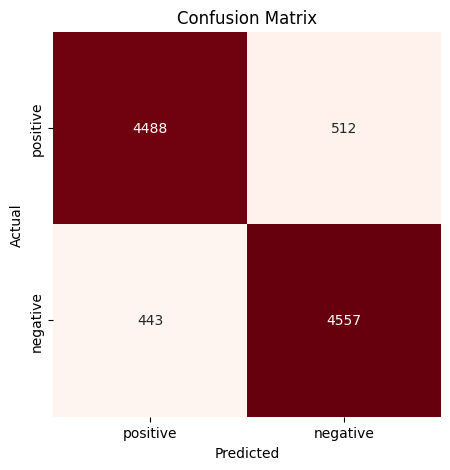

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, xticklabels=label2id.keys(), yticklabels=label2id.keys(), fmt ='d', cbar=False, cmap='Reds')
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.show()

#Build Prediction function and save model

In [ ]:
text = '''Look...I've come to expect this level of acting from William Macy...the guy just keeps putting in terrific performances...but MEAT LOAF? Just when did His Loafness decide to leave Jim Steinman behind and throw his decidedly lower weight around in the wonderful world of Stanislavsky? Well...what can I say? I'm duly impressed. To paraphrase an old adage: "It ain't the meat, it's the emotion"...and the Loaf is quietly buffing up his acting chops of late..<br /><br />Laura Dern carries off the 40's look perfectly here...great job by the costume and hair departments...David Paymer is typecast but right on the money. Solid camera work throughout the flick. The plot line is reminiscent of 'Gentleman's Agreement' (post-WWII anti-semitism). Well worth your time...particularly for the growing legions of Bill Macy acolytes.<br /><br />'''

def get_prediction (text) :
    text = clean_text(text)
    text = remove_stopwords(text)
    input_encoded = tokenizer(text, return_tensors='pt').to(device)
    with torch.no_grad():
      outputs = model(**input_encoded)
    logits = outputs. logits
    pred = torch.argmax(logits, dim=1) .item()
    print(len(text))
    return id2label[pred]
get_prediction (text)


585


'positive'

In [ ]:
trainer.save_model("distilbert-base-uncased-sentiment-model")

In [ ]:
# use pipeline for prediciton
from transformers import pipeline
classifier = pipeline('text-classification', model= 'distilbert-base-uncased-sentiment-model')
classifier([text, 'A very good day indeed', "We loved mth111", "I am feeling anxious"])

Device set to use cuda:0


[{'label': 'positive', 'score': 0.8429738283157349},
 {'label': 'positive', 'score': 0.8515955805778503},
 {'label': 'positive', 'score': 0.933463990688324},
 {'label': 'positive', 'score': 0.5033805966377258}]

In [ ]:
# make a file app.py, and use this code


# import streamlit as st
# from transformers import pipeline

# st.title("Fine-Tuning BERT for Twitter Sentiment Classification")

# classifier = pipeline('text-classification', model='distilbert-base-uncased-sentiment-model')

# text = st.text_area("Enter Your Tweet Here")

# if st.button("Predict"):
#         result = classifier(text)
#         st.write("Prediction Result:", result)

#